In questo colab plottiamo i dati relativi ai tempi di esecuzione di vari modelli testati con ScaleSim

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df1 = pd.read_csv('exec_time_SS1.csv').sort_values(by='numero di livelli')
df2 = pd.read_csv('exec_time_SS2.csv').sort_values(by='numero di livelli')

In [8]:
df2.head()

,nome,numero di livelli,tempo di esecuzione
0,deep_voice,3,2.234430
3,google_translate_dec,8,4.031276
4,google_translate_enc,9,4.562437
1,FasterRCNN,46,876.902472
5,Resnet50,54,903.060680


In [23]:
exec_time_log_1 = np.log(df1["tempo di esecuzione"])
exec_time_log_2 = np.log(df2["tempo di esecuzione"])

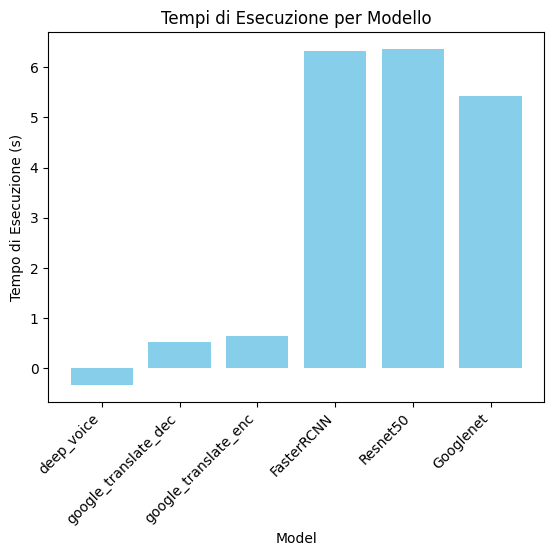

In [24]:
plt.bar(df1['nome'], exec_time_log_1, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Tempi di Esecuzione per Modello in log-scale")
plt.xlabel("Model")
plt.ylabel("Tempo di Esecuzione (s)")

plt.show()

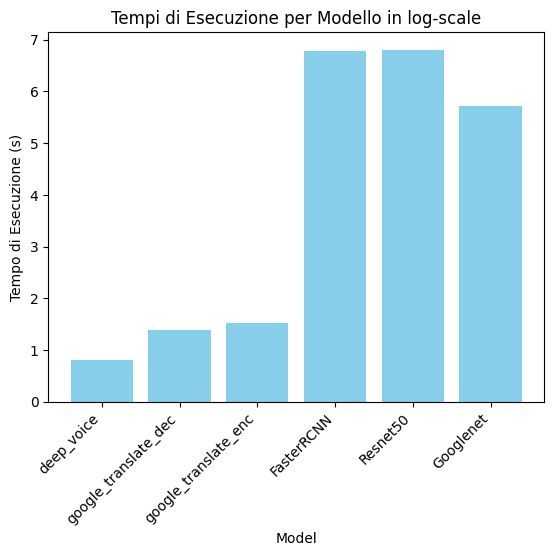

In [25]:
plt.bar(df2['nome'], exec_time_log_2, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Tempi di Esecuzione per Modello in log-scale")
plt.xlabel("Model")
plt.ylabel("Tempo di Esecuzione (s)")

plt.show()

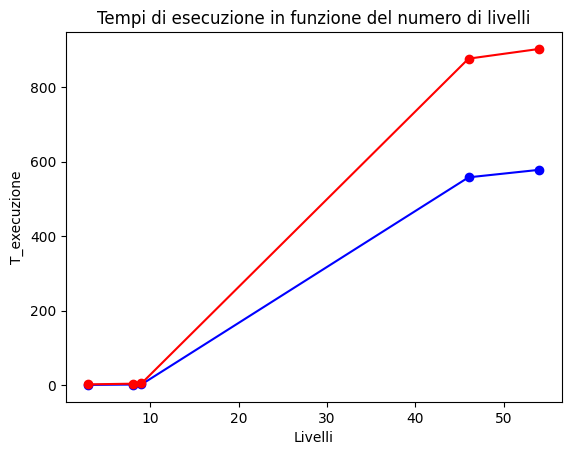

In [15]:
plt.plot(df1['numero di livelli'][:-1], df1['tempo di esecuzione'][:-1], marker='o', linestyle='-', color='blue')
plt.plot(df2['numero di livelli'][:-1], df2['tempo di esecuzione'][:-1], marker='o', linestyle='-', color='red')

plt.title("Tempi di esecuzione in funzione del numero di livelli")
plt.xlabel("Livelli")
plt.ylabel("T_execuzione")

# Mostra il grafico
plt.show()